In [1]:
## Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
#The above lines of code are importing necessary libraries and modules for the task.


In [ ]:
#The link of the data we use in this project: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

In [2]:
# List of labels

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
#We are defining the labels for our classification problem. These are the categories our model will predict.



In [3]:
# Loading and preprocessing the data
#We are initializing empty lists for the training data (X_train for the images, y_train for the labels) and defining the image size that we will resize all images to.
X_train = []
y_train = []
image_size = 150


# Loop over the labels and read corresponding images, resize them and append to X_train
#We are looping over each folder (each label corresponds to one folder), reading each image in the folder, resizing it to the predefined image size, and appending it to X_train. We are also appending the corresponding label to y_train.
for i in labels:
    folderPath = os.path.join('brain_tumor_data','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

# Same loop for the test data
#We are repeating the same process for test data.        
for i in labels:
    folderPath = os.path.join('brain_tumor_data','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 108.19it/s]


In [4]:
# Shuffle the data
X_train, y_train = shuffle(X_train,y_train, random_state=101)
#Shuffling the data is important to prevent patterns caused by the order of the images from affecting the training process.

In [5]:
# Split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)
#We are splitting the data into a training set (90%) and a testing set (10%).

In [6]:
# Convert the labels to one-hot encoded vectors
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)
#We are converting the categorical labels to one-hot encoded vectors because that's the format needed for multiclass classification with Keras.

In [12]:
# Define the model
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation function. The input shape is the shape of the images.
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size,image_size,3)))

# Add a max pooling layer to reduce the dimensionality of the output from the previous layer.
model.add(MaxPool2D((2,2)))

# Add the second convolutional layer with 64 filters and a 2x2 kernel.
model.add(Conv2D(64,(2,2),activation='relu'))

# Add another max pooling layer.
model.add(MaxPool2D(2,2))

# Flatten the 2D arrays output from the previous layer to create a 1D array.
model.add(Flatten())

# Add a dense (fully connected) layer with 64 neurons.
model.add(Dense(64,activation='relu'))

# Add a dropout layer for regularization to help prevent overfitting. 50% of the neurons in the previous layer will be turned off during each training epoch.
model.add(Dropout(0.5))

# Add the output layer which is another dense layer. Since there are 4 classes, it has 4 neurons. The 'softmax' activation function ensures the output values are in the range [0, 1] and sum to 1, so they can be interpreted as probabilities.
model.add(Dense(4,activation='softmax'))

#We are defining a convolutional neural network model with two convolutional layers, each followed by a max-pooling layer, then a flattening layer, a dense layer, a dropout layer for regularization, and finally a dense layer with softmax activation for outputting probabilities for each of the four classes.


In [13]:
# Compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['Accuracy'])
#We are compiling the model with the Adam optimizer, categorical cross entropy loss function (commonly used for multiclass classification), and accuracy as the metric.


In [16]:
# Train the model
hist = model.fit(X_train,y_train,epochs=12,validation_data=(X_test,y_test))
#We are training the model for 12 epochs on the training data and validating it on the testing data.

Epoch 1/12
92/92 [==============================] - 15s 166ms/step - loss: 0.6091 - Accuracy: 0.7280 - val_loss: 0.4336 - val_Accuracy: 0.8593
Epoch 2/12
92/92 [==============================] - 14s 153ms/step - loss: 0.6277 - Accuracy: 0.7201 - val_loss: 0.4516 - val_Accuracy: 0.8593
Epoch 3/12
92/92 [==============================] - 14s 157ms/step - loss: 0.5439 - Accuracy: 0.7654 - val_loss: 0.3810 - val_Accuracy: 0.8716
Epoch 4/12
92/92 [==============================] - 14s 153ms/step - loss: 0.5738 - Accuracy: 0.7453 - val_loss: 0.3812 - val_Accuracy: 0.8746
Epoch 5/12
92/92 [==============================] - 14s 153ms/step - loss: 0.5573 - Accuracy: 0.7661 - val_loss: 0.4133 - val_Accuracy: 0.8410
Epoch 6/12
92/92 [==============================] - 14s 149ms/step - loss: 0.5421 - Accuracy: 0.7654 - val_loss: 0.3709 - val_Accuracy: 0.8563
Epoch 7/12
92/92 [==============================] - 14s 156ms/step - loss: 0.5093 - Accuracy: 0.7709 - val_loss: 0.3933 - val_Accuracy: 0.8685

In [22]:
# Save the model and weights
model.save("brain_tumor_main.h5")
model.save_weights("brain_tumor_main_weights.h5")
#We are saving the model architecture and the trained weights to disk so they can be loaded and used later without having to retrain the model.

In [27]:
from tensorflow.keras.models import load_model
# Load the model
model2 = load_model("brain_tumor_main.h5")
#We are loading the saved model.

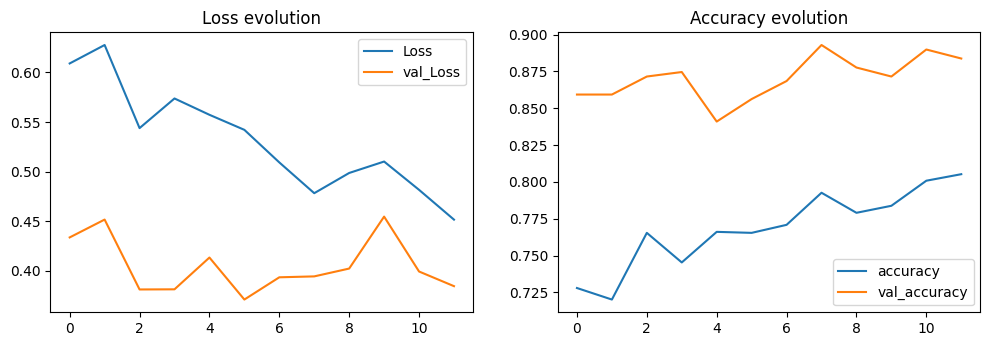

In [35]:
# Plot loss and accuracy
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(hist.history['Accuracy'], label='accuracy')
plt.plot(hist.history['val_Accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

plt.show()
#We are plotting the loss and accuracy for the training and validation sets as they evolved over the epochs.

11/11 [==============================] - 0s 30ms/step


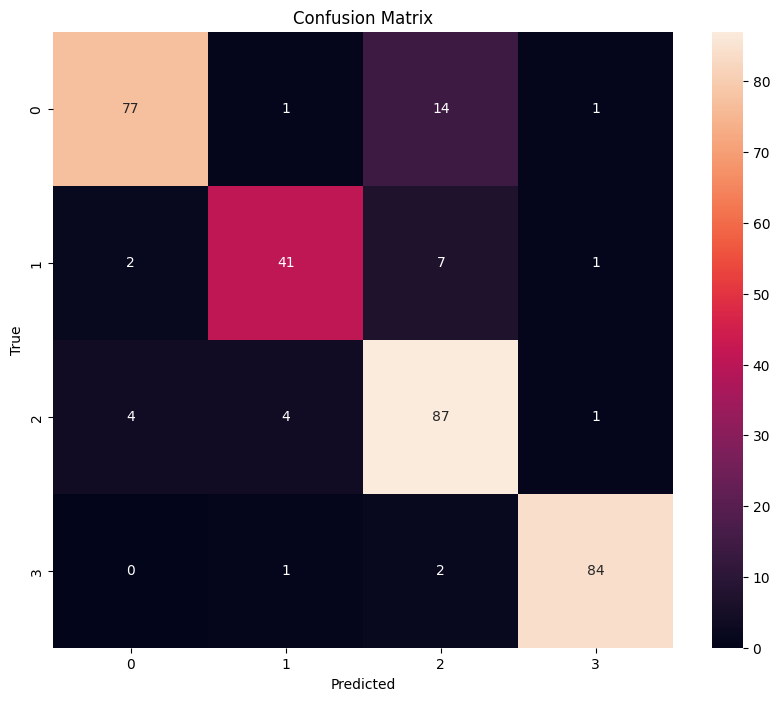

In [34]:
# Plot confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Finally, we are predicting the classes for the test set, comparing them to the true classes, and plotting a confusion matrix to visualize the model's performance.